In [41]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

def extract(flow_type, flow_lengths, anneals, metric, stdlist, withoutlist=None, kllist=None):
    for flow in flow_lengths:
        kpath = "logs/" + flow_type + "flow_k_" + str(flow)
        for anneal in anneals:
            rpath = "results_" + anneal + "annealing.json"
            filepath = os.path.join(kpath, rpath)
            metriclist = []
            try:
                with open(filepath) as file:
                    data = json.load(file)
                    metriclist.append(data[metric])
            except:
                pass
            rpath2 = "results_" + anneal + "annealing_2.json"
            filepath2 = os.path.join(kpath, rpath2)
            try:
                with open(filepath2) as file:
                    data = json.load(file)
                    metriclist.append(data[metric])
            except:
                pass
            rpath3 = "results_" + anneal + "annealing_3.json"
            filepath3 = os.path.join(kpath, rpath3)
            try:
                with open(filepath3) as file:
                    data = json.load(file)
                    metriclist.append(data[metric])
            except:
                pass
            if anneal == "std":
                list = stdlist
            elif anneal == "without":
                list = withoutlist
            elif anneal == "kl":
                list = kllist
            list.append(metriclist)
    
    return stdlist, withoutlist, kllist

def calculatekl(flowlengths, KL_list, ELBO_list, LL_list):
    for i in range(len(flowlengths)):
        zip_object = zip(ELBO_list[i], LL_list[i])
        KL = []
        for ELBO_i, LL_i in zip_object:
            KL.append(ELBO_i - LL_i)
        KL_list.append(KL)
    
    return KL_list

def calculatemeanstd(list, mean_list, stdev_list):
    for item in list:
        if len(item) == 0:
            continue
        else:
            mean = sum(item) / len(item)
            stdev = np.std(item)
            mean_list.append(mean)
            stdev_list.append(stdev)
    
    return mean_list, stdev_list

def plot(metric, flowlength1=None, flowlength2=None, flowlength3=None, flowlength4=None, flowlength5=None, line1_mean=None, line1_stdev=None, line2_mean=None, line2_stdev=None, line3_mean=None, line3_stdev=None, line4_mean=None, line4_stdev=None, line5_mean=None, line5_stdev=None, label1=None, label2=None, label3=None, label4=None, label5=None):
    plt.errorbar(flowlength1, line1_mean, yerr=line1_stdev, label=label1, marker='s', markersize=4)
    plt.errorbar(flowlength2, line2_mean, yerr=line2_stdev, label=label2, marker='s', markersize=4)
    plt.errorbar(flowlength3, line3_mean, yerr=line3_stdev, label=label3, marker='s', markersize=4)
    plt.errorbar(flowlength4, line4_mean, yerr=line4_stdev, label=label4, marker='s', markersize=4)
    plt.errorbar(flowlength5, line5_mean, yerr=line5_stdev, label=label5, marker='s', markersize=4)
    plt.xlabel("Flow length", fontsize=16)
    plt.ylabel(metric, fontsize=16)
    plt.legend(prop={'size': 16})

In [42]:
planarflowlengths = [0, 10, 20, 40, 80]
planaranneals = ["std", "without", "kl"]

ELBO_stdanneal = []
ELBO_withoutanneal = []
ELBO_klanneal = []

log_likelihood_stdanneal = []
log_likelihood_withoutanneal = []
log_likelihood_klanneal = []

KL_stdanneal = []
KL_withoutanneal = []
KL_klanneal = []

ELBO_stdanneal_mean = []
ELBO_withoutanneal_mean  = []
ELBO_klanneal_mean = []
ELBO_stdanneal_stdev = []
ELBO_withoutanneal_stdev  = []
ELBO_klanneal_stdev = []

log_likelihood_stdanneal_mean = []
log_likelihood_withoutanneal_mean = []
log_likelihood_klanneal_mean = []
log_likelihood_stdanneal_stdev = []
log_likelihood_withoutanneal_stdev = []
log_likelihood_klanneal_stdev = []

KL_stdanneal_mean = []
KL_withoutanneal_mean  = []
KL_klanneal_mean = []
KL_stdanneal_stdev = []
KL_withoutanneal_stdev  = []
KL_klanneal_stdev = []

ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal = extract("planar", planarflowlengths, planaranneals, "ELBO", ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal)
log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal = extract("planar", planarflowlengths, planaranneals, "Log_likelihood", log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal)

KL_stdanneal = calculatekl(planarflowlengths, KL_stdanneal, ELBO_stdanneal, log_likelihood_stdanneal)
KL_withoutanneal = calculatekl(planarflowlengths, KL_withoutanneal, ELBO_withoutanneal, log_likelihood_withoutanneal)
KL_klanneal = calculatekl(planarflowlengths, KL_klanneal, ELBO_klanneal, log_likelihood_klanneal)

ELBO_stdanneal_mean, ELBO_stdanneal_stdev = calculatemeanstd(ELBO_stdanneal, ELBO_stdanneal_mean, ELBO_stdanneal_stdev)
ELBO_withoutanneal_mean, ELBO_withoutanneal_stdev = calculatemeanstd(ELBO_withoutanneal, ELBO_withoutanneal_mean, ELBO_withoutanneal_stdev)
ELBO_klanneal_mean, ELBO_klanneal_stdev = calculatemeanstd(ELBO_klanneal, ELBO_klanneal_mean, ELBO_klanneal_stdev)

log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev = calculatemeanstd(log_likelihood_stdanneal, log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev)
log_likelihood_withoutanneal_mean, log_likelihood_withoutanneal_stdev = calculatemeanstd(log_likelihood_withoutanneal, log_likelihood_withoutanneal_mean, log_likelihood_withoutanneal_stdev)
log_likelihood_klanneal_mean, log_likelihood_klanneal_stdev = calculatemeanstd(log_likelihood_klanneal, log_likelihood_klanneal_mean, log_likelihood_klanneal_stdev)

KL_stdanneal_mean, KL_stdanneal_stdev = calculatemeanstd(KL_stdanneal, KL_stdanneal_mean, KL_stdanneal_stdev)
KL_withoutanneal_mean, KL_withoutanneal_stdev = calculatemeanstd(KL_withoutanneal, KL_withoutanneal_mean, KL_withoutanneal_stdev)
KL_klanneal_mean, KL_klanneal_stdev = calculatemeanstd(KL_klanneal, KL_klanneal_mean, KL_klanneal_stdev)

In [43]:
sylvesterflowlengths = [10, 20, 40]
sylvesteranneals = ["std", "kl"]

ELBO_sylvester = []
ELBO_sylvester_klanneal = []

log_likelihood_sylvester = []
log_likelihood_sylvester_klanneal = []

KL_sylvester = []
KL_sylvester_klanneal = []

ELBO_sylvester_mean = []
ELBO_sylvester_klanneal_mean = []
ELBO_sylvester_stdev = []
ELBO_sylvester_klanneal_stdev = []

log_likelihood_sylvester_mean = []
log_likelihood_sylvester_klanneal_mean = []
log_likelihood_sylvester_stdev = []
log_likelihood_sylvester_klanneal_stdev = []

KL_sylvester_mean = []
KL_sylvester_klanneal_mean = []
KL_sylvester_stdev = []
KL_sylvester_klanneal_stdev = []

ELBO_sylvester, x, ELBO_sylvester_klanneal = extract("syl_orthogonal", sylvesterflowlengths, sylvesteranneals, "ELBO", ELBO_sylvester, kllist=ELBO_sylvester_klanneal)
log_likelihood_sylvester, x, log_likelihood_sylvester_klanneal = extract("syl_orthogonal", sylvesterflowlengths, sylvesteranneals, "log_likelihood", log_likelihood_sylvester, kllist=log_likelihood_sylvester_klanneal)

KL_sylvester = calculatekl(sylvesterflowlengths, KL_sylvester, ELBO_sylvester, log_likelihood_sylvester)
KL_sylvester_klanneal = calculatekl(sylvesterflowlengths, KL_sylvester_klanneal, ELBO_sylvester_klanneal, log_likelihood_sylvester_klanneal)

ELBO_sylvester_mean, ELBO_sylvester_stdev = calculatemeanstd(ELBO_sylvester, ELBO_sylvester_mean, ELBO_sylvester_stdev)
ELBO_sylvester_klanneal_mean, ELBO_sylvester_klanneal_stdev = calculatemeanstd(ELBO_sylvester_klanneal, ELBO_sylvester_klanneal_mean, ELBO_sylvester_klanneal_stdev)

log_likelihood_sylvester_mean, log_likelihood_sylvester_stdev = calculatemeanstd(log_likelihood_sylvester, log_likelihood_sylvester_mean, log_likelihood_sylvester_stdev)
log_likelihood_sylvester_klanneal_mean, log_likelihood_sylvester_klanneal_stdev = calculatemeanstd(log_likelihood_sylvester_klanneal, log_likelihood_sylvester_klanneal_mean, log_likelihood_sylvester_klanneal_stdev)

KL_sylvester_mean, KL_sylvester_stdev = calculatemeanstd(KL_sylvester, KL_sylvester_mean, KL_sylvester_stdev)
KL_sylvester_klanneal_mean, KL_sylvester_klanneal_stdev = calculatemeanstd(KL_sylvester_klanneal, KL_sylvester_klanneal_mean, KL_sylvester_klanneal_stdev)

In [44]:
NICEflowlengths = [10, 20, 40, 80]

ELBO_NICE_10 = [94.6280753326416, 94.50710372924804, 94.45023307800292]
ELBO_NICE_20 = [93.50998664855958, 93.41755195617675, 93.31212902069092]
ELBO_NICE_40 = [92.52796005249023, 92.49368591308594, 92.4586374282837]
ELBO_NICE_80 = [91.81882984161376, 91.87198257446289, 91.89329307556153]

NLL_NICE_10 = [90.10142641119523, 89.89949784807726, 89.88968153032823]
NLL_NICE_20 = [89.09025205778643, 89.08417805666491, 89.03694590963885]
NLL_NICE_40 = [88.41398353895708, 88.47128256544634, 88.34509929670854]
NLL_NICE_80 = [87.9569898316817, 87.95931098589465, 87.97126101660295]

ELBO_NICE = [ELBO_NICE_10, ELBO_NICE_20, ELBO_NICE_40, ELBO_NICE_80]
log_likelihood_NICE = [NLL_NICE_10, NLL_NICE_20, NLL_NICE_40, NLL_NICE_80]
KL_NICE = []

ELBO_NICE_mean = []
ELBO_NICE_stdev = []
log_likelihood_NICE_mean = []
log_likelihood_NICE_stdev = []
KL_NICE_mean = []
KL_NICE_stdev = []

KL_NICE = calculatekl(NICEflowlengths, KL_NICE, ELBO_NICE, log_likelihood_NICE)

ELBO_NICE_mean, ELBO_NICE_stdev = calculatemeanstd(ELBO_NICE, ELBO_NICE_mean, ELBO_NICE_stdev)
log_likelihood_NICE_mean, log_likelihood_NICE_stdev = calculatemeanstd(log_likelihood_NICE, log_likelihood_NICE_mean, log_likelihood_NICE_stdev)
KL_NICE_mean, KL_NICE_stdev = calculatemeanstd(KL_NICE, KL_NICE_mean, KL_NICE_stdev)


NICEMLPflowlengths = [10, 20, 40, 80]

ELBO_NICEMLP_10 = [94.64440059661865, 94.7157638168335, 94.73168972015381]
ELBO_NICEMLP_20 = [93.86162654876709, 93.88126354217529, 93.95367023468017]
ELBO_NICEMLP_40 = [93.31743923187256, 93.18998489379882, 93.24120609283447]
ELBO_NICEMLP_80 = [92.6874153137207, 92.81109645843506, 92.69840572357178]

NLL_NICEMLP_10 = [89.86571013941332, 90.07850893339678, 90.00390668463274]
NLL_NICEMLP_20 = [89.31897270121141, 89.355128909059, 89.40332983450456]
NLL_NICEMLP_40 = [88.94365163569017, 88.91765420240922, 88.94680970644518]
NLL_NICEMLP_80 = [88.61429247755571, 88.66341416124864, 88.55371260408923]

ELBO_NICEMLP = [ELBO_NICEMLP_10, ELBO_NICEMLP_20, ELBO_NICEMLP_40, ELBO_NICEMLP_80]
log_likelihood_NICEMLP = [NLL_NICEMLP_10, NLL_NICEMLP_20, NLL_NICEMLP_40, NLL_NICEMLP_80]
KL_NICEMLP = []

ELBO_NICEMLP_mean = []
ELBO_NICEMLP_stdev = []
log_likelihood_NICEMLP_mean = []
log_likelihood_NICEMLP_stdev = []
KL_NICEMLP_mean = []
KL_NICEMLP_stdev = []

KL_NICEMLP = calculatekl(NICEMLPflowlengths, KL_NICEMLP, ELBO_NICEMLP, log_likelihood_NICEMLP)

ELBO_NICEMLP_mean, ELBO_NICEMLP_stdev = calculatemeanstd(ELBO_NICEMLP, ELBO_NICEMLP_mean, ELBO_NICEMLP_stdev)
log_likelihood_NICEMLP_mean, log_likelihood_NICEMLP_stdev = calculatemeanstd(log_likelihood_NICEMLP, log_likelihood_NICEMLP_mean, log_likelihood_NICEMLP_stdev)
KL_NICEMLP_mean, KL_NICEMLP_stdev = calculatemeanstd(KL_NICEMLP, KL_NICEMLP_mean, KL_NICEMLP_stdev)


realnvp_flowlengths = [10, 20, 40, 80]
ELBO_realnvp = [93.83925666809083, 92.99791007995606, 92.58845329284668, 92.26656967163086]
log_likelihood_realnvp = [89.16259377111956, 88.56570585779711, 88.21704735674425, 87.91573817858263]
KL_realnvp = []

for i in range(len(ELBO_realnvp)):
    KL_realnvp.append(ELBO_realnvp[i] - log_likelihood_realnvp[i])

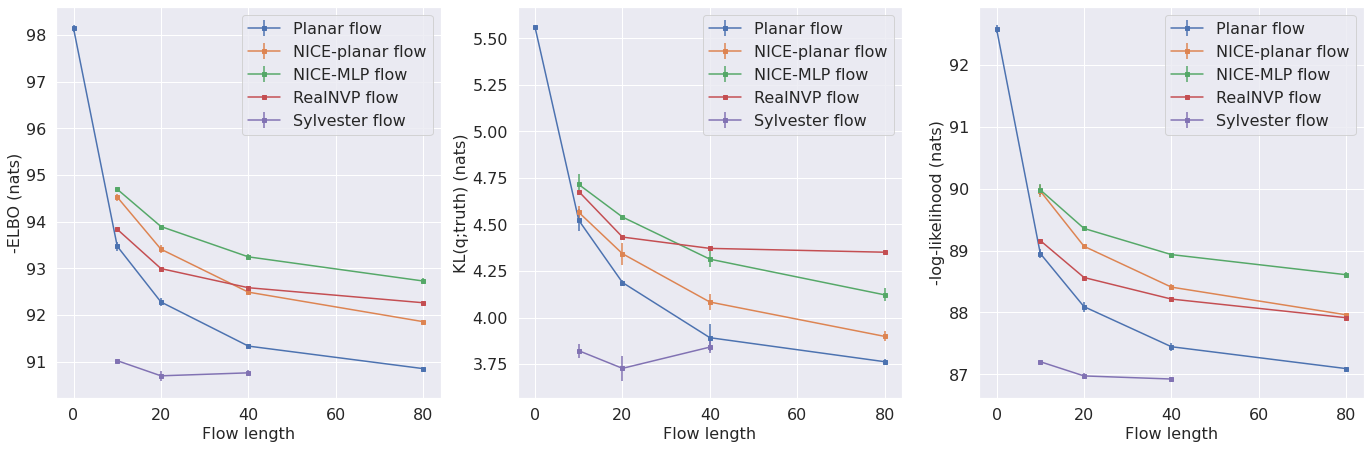

In [45]:
plt.figure(figsize=(19.2,6.4))
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
plt.subplot(1,3,1)
plot("-ELBO (nats)", flowlength1=planarflowlengths, flowlength2=NICEflowlengths, flowlength3=NICEMLPflowlengths, flowlength4=realnvp_flowlengths, flowlength5=sylvesterflowlengths, line1_mean=ELBO_stdanneal_mean, line1_stdev=ELBO_stdanneal_stdev, line2_mean=ELBO_NICE_mean, line2_stdev=ELBO_NICE_stdev, line3_mean=ELBO_NICEMLP_mean, line3_stdev=ELBO_NICEMLP_stdev, line4_mean=ELBO_realnvp, line5_mean=ELBO_sylvester_mean, line5_stdev=ELBO_sylvester_stdev, label1="Planar flow", label2="NICE-planar flow", label3="NICE-MLP flow", label4="RealNVP flow", label5="Sylvester flow")
plt.subplot(1,3,2)
plot("KL(q;truth) (nats)", flowlength1=planarflowlengths, flowlength2=NICEflowlengths, flowlength3=NICEMLPflowlengths, flowlength4=realnvp_flowlengths, flowlength5=sylvesterflowlengths, line1_mean=KL_stdanneal_mean, line1_stdev=KL_stdanneal_stdev, line2_mean=KL_NICE_mean, line2_stdev=KL_NICE_stdev, line3_mean=KL_NICEMLP_mean, line3_stdev=KL_NICEMLP_stdev, line4_mean=KL_realnvp, line5_mean=KL_sylvester_mean, line5_stdev=KL_sylvester_stdev, label1="Planar flow", label2="NICE-planar flow", label3="NICE-MLP flow", label4="RealNVP flow", label5="Sylvester flow")
plt.subplot(1,3,3)
plot("-log-likelihood (nats)", flowlength1=planarflowlengths, flowlength2=NICEflowlengths, flowlength3=NICEMLPflowlengths, flowlength4=realnvp_flowlengths, flowlength5=sylvesterflowlengths, line1_mean=log_likelihood_stdanneal_mean, line1_stdev=log_likelihood_stdanneal_stdev, line2_mean=log_likelihood_NICE_mean, line2_stdev=log_likelihood_NICE_stdev, line3_mean=log_likelihood_NICEMLP_mean, line3_stdev=log_likelihood_NICEMLP_stdev, line4_mean=log_likelihood_realnvp, line5_mean=log_likelihood_sylvester_mean, line5_stdev=log_likelihood_sylvester_stdev, label1="Planar flow", label2="NICE-planar flow", label3="NICE-MLP flow", label4="RealNVP flow", label5="Sylvester flow")
plt.tight_layout()
plt.savefig("MNIST_flows.pdf")
plt.show()

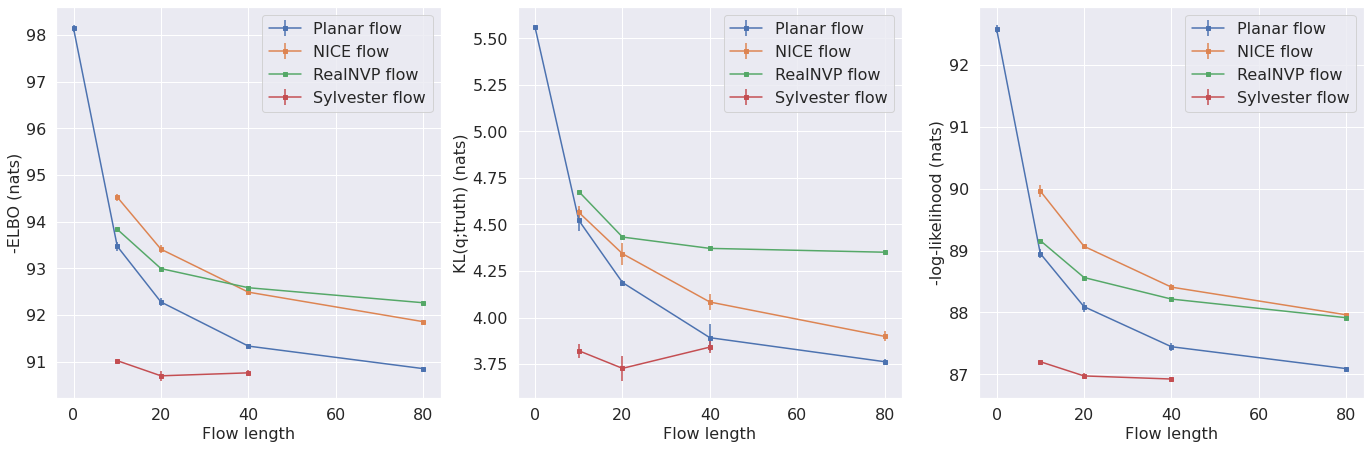

In [46]:
plt.figure(figsize=(19.2,6.4))
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
plt.subplot(1,3,1)
plot("-ELBO (nats)", flowlength1=planarflowlengths, flowlength2=NICEflowlengths, flowlength3=realnvp_flowlengths, flowlength4=sylvesterflowlengths, line1_mean=ELBO_stdanneal_mean, line1_stdev=ELBO_stdanneal_stdev, line2_mean=ELBO_NICE_mean, line2_stdev=ELBO_NICE_stdev, line3_mean=ELBO_realnvp, line4_mean=ELBO_sylvester_mean, line4_stdev=ELBO_sylvester_stdev, label1="Planar flow", label2="NICE flow", label3="RealNVP flow", label4="Sylvester flow")
plt.subplot(1,3,2)
plot("KL(q;truth) (nats)", flowlength1=planarflowlengths, flowlength2=NICEflowlengths, flowlength3=realnvp_flowlengths, flowlength4=sylvesterflowlengths, line1_mean=KL_stdanneal_mean, line1_stdev=KL_stdanneal_stdev, line2_mean=KL_NICE_mean, line2_stdev=KL_NICE_stdev, line3_mean=KL_realnvp, line4_mean=KL_sylvester_mean, line4_stdev=KL_sylvester_stdev, label1="Planar flow", label2="NICE flow", label3="RealNVP flow", label4="Sylvester flow")
plt.subplot(1,3,3)
plot("-log-likelihood (nats)", flowlength1=planarflowlengths, flowlength2=NICEflowlengths, flowlength3=realnvp_flowlengths, flowlength4=sylvesterflowlengths, line1_mean=log_likelihood_stdanneal_mean, line1_stdev=log_likelihood_stdanneal_stdev, line2_mean=log_likelihood_NICE_mean, line2_stdev=log_likelihood_NICE_stdev, line3_mean=log_likelihood_realnvp, line4_mean=log_likelihood_sylvester_mean, line4_stdev=log_likelihood_sylvester_stdev, label1="Planar flow", label2="NICE flow", label3="RealNVP flow", label4="Sylvester flow")
plt.tight_layout()
plt.savefig("MNIST_flows2.pdf")
plt.show()

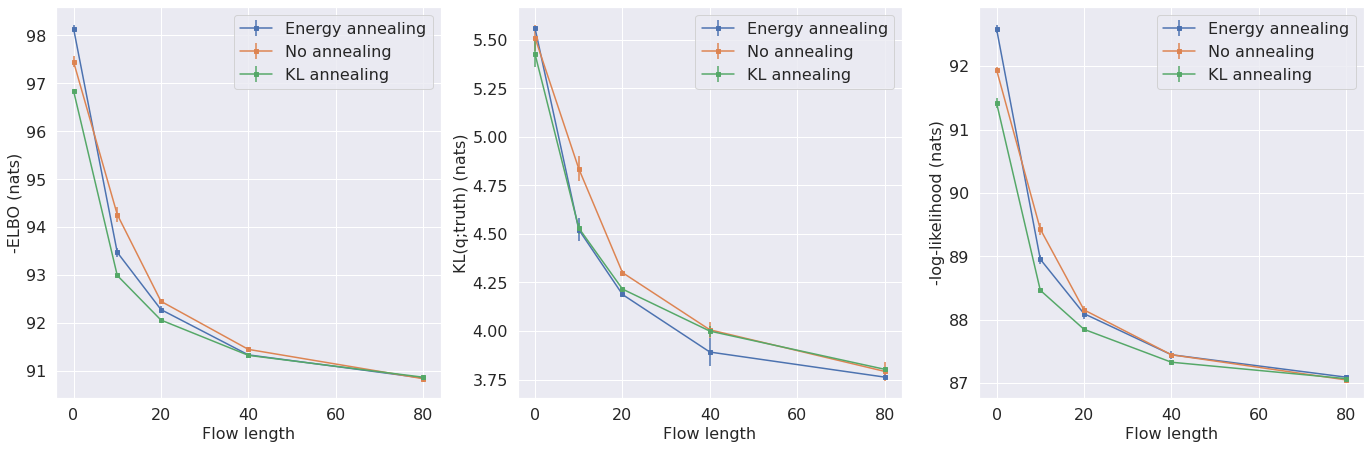

In [47]:
plt.figure(figsize=(19.2,6.4))
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
plt.subplot(1,3,1)
plot("-ELBO (nats)", flowlength1=planarflowlengths, flowlength2=planarflowlengths, flowlength3=planarflowlengths, line1_mean=ELBO_stdanneal_mean, line1_stdev=ELBO_stdanneal_stdev, line2_mean=ELBO_withoutanneal_mean, line2_stdev=ELBO_withoutanneal_stdev, line3_mean=ELBO_klanneal_mean, line3_stdev=ELBO_klanneal_stdev, label1="Energy annealing", label2="No annealing", label3="KL annealing")
plt.subplot(1,3,2)
plot("KL(q;truth) (nats)", flowlength1=planarflowlengths, flowlength2=planarflowlengths, flowlength3=planarflowlengths, line1_mean=KL_stdanneal_mean, line1_stdev=KL_stdanneal_stdev, line2_mean=KL_withoutanneal_mean, line2_stdev=KL_withoutanneal_stdev, line3_mean=KL_klanneal_mean, line3_stdev=KL_klanneal_stdev, label1="Energy annealing", label2="No annealing", label3="KL annealing")
plt.subplot(1,3,3)
plot("-log-likelihood (nats)", flowlength1=planarflowlengths, flowlength2=planarflowlengths, flowlength3=planarflowlengths, line1_mean=log_likelihood_stdanneal_mean, line1_stdev=log_likelihood_stdanneal_stdev, line2_mean=log_likelihood_withoutanneal_mean, line2_stdev=log_likelihood_withoutanneal_stdev, line3_mean=log_likelihood_klanneal_mean, line3_stdev=log_likelihood_klanneal_stdev, label1="Energy annealing", label2="No annealing", label3="KL annealing")
plt.tight_layout()
plt.savefig("MNIST_anneal.pdf")
plt.show()

In [48]:
print(ELBO_stdanneal_mean, ELBO_withoutanneal_mean, ELBO_klanneal_mean, ELBO_NICE_mean, ELBO_NICEMLP_mean, ELBO_sylvester_mean)
print(log_likelihood_stdanneal_mean, log_likelihood_withoutanneal_mean, log_likelihood_klanneal_mean, log_likelihood_NICE_mean, log_likelihood_NICEMLP_mean, log_likelihood_sylvester_mean)

[98.14235450744629, 93.47531293233236, 92.28246643066406, 91.33812123616536, 90.85548336029052] [97.44929048538208, 94.2637247657776, 92.45486413955689, 91.45242635726929, 90.84129020690918] [96.84217462539672, 92.99374221801759, 92.06369346618652, 91.32811191558838, 90.87222074508668] [94.52847071329752, 93.41322254180909, 92.49342779795329, 91.86136849721272] [94.69728471120197, 93.89885344187418, 93.24954340616863, 92.73230583190919] [91.02555866241454, 90.70140959421794, 90.76528087615968]
[92.58421707383359, 88.95316157602831, 88.09435103951658, 87.44633655962512, 87.09264211941922] [91.94016512960954, 89.42815200676485, 88.15420470308824, 87.44614710421129, 87.0490473261313] [91.41714924282594, 88.46347812313601, 87.84767297043368, 87.32853058638139, 87.06916275648638] [89.96353526320024, 89.07045867469674, 88.41012180037065, 87.96252061139309] [89.98270858581428, 89.35914381492499, 88.93603851484818, 88.61047308096452] [87.20379109765257, 86.97421422368252, 86.92405106641019]
